# **花卷学Python**
---

> **我年纪轻轻就学会了Python编程**


# **第十二章、Python编程：常用第三方模块**

   - [x] **psutil**
   - [x] **prettytable**
   - [x] **requests**
   - [x] **beautifulsoup**
   - [x] **数据分析三剑客：numpy、matplotlib、pandas**
   - [x] **jieba**
   - [x] **pillow**
   - [x] **opencv**


Python拥有强大的第三方模块库，可以让你做任何事情，和内置模块最大区别在于，第三方模块要想使用必须先：pip install安装一下。

基本上，所有的第三方模块都会在PyPI - the Python Package Index上注册，只要找到对应的模块名字，即可用pip安装。

**强烈推荐安装Anaconda，安装后，数十个常用的第三方模块就已经就绪，不用pip手动安装。**

---

# **一、pstuil和prettytable**

---

## **安装**

- **`pip install pstuil`**
- **`pip install prettytable`**

## **用途**

- **pstuil：运维可以获取系统信息：内存，cpu，网速等等**
- **prettytable：可用来生成美观的ASCII格式的表格**

# **psutil**

In [12]:
import psutil

#cpu模块
def cpu_info():
    cpu = '%.2f%%' % psutil.cpu_percent(1)  #把cpu的值改成百分比的形式
    return cpu


#内存模块
def mem_info():
    mem = psutil.virtual_memory()
    mem_per = '%.2f%%' % mem[2]  #同上
    mem_total = str(int(mem[0] / 1024 / 1024)) + 'M'
    mem_used = str(int(mem[3] / 1024 / 1024)) + 'M'
    info = {'mem_per': mem_per, 'mem_total': mem_total, 'mem_used': mem_used}
    return info


#磁盘分区模块
def disk_info():
    data_per = '%.2f%%' % psutil.disk_usage('C://')[3]
    info = {
        'data_per': data_per,
    }
    return info


#网卡模块
def network_info():
    network = psutil.net_io_counters()
    network_sent = str(int(network[0] / 8 / 1024 / 1024)) + 'M'
    network_recv = str(int(network[1] / 8 / 1024 / 1024)) + 'M'
    info = {'network_sent': network_sent, 'network_recv': network_recv}
    return info

In [9]:
cpu_info()

'3.80%'

In [10]:
mem_info()

{'mem_per': '45.10%', 'mem_total': '16130M', 'mem_used': '7274M'}

In [13]:
disk_info()

{'data_per': '62.20%'}

In [14]:
network_info()

{'network_sent': '4M', 'network_recv': '19M'}

# **prettytable**

```python

import prettytable

# 创建表

tb = prettytable.PrettyTable()

# 增加列名

tb.field_names = [name1,name2,...]

# 按行增加数据

tb.add_row(list)

# 按列增加数据

tb.add_column(列名,list)

```

In [15]:
import prettytable

tb = prettytable.PrettyTable()
tb.field_names = ['c1','c2','c3']
tb.add_row(['name1',10,11])
tb.add_row(['name2',100,110])
tb.add_row(['name3',1000,1100])

print(tb)

+-------+------+------+
|   c1  |  c2  |  c3  |
+-------+------+------+
| name1 |  10  |  11  |
| name2 | 100  | 110  |
| name3 | 1000 | 1100 |
+-------+------+------+


## **我们把上面运维的数值转化成表格**

In [16]:
import psutil
import prettytable

cpu = '%.2f%%' % psutil.cpu_percent(1)
mem = psutil.virtual_memory()
mem_per = '%.2f%%' % mem[2]  #同上
mem_total = str(int(mem[0] / 1024 / 1024)) + 'M'
mem_used = str(int(mem[3] / 1024 / 1024)) + 'M'
data_per = '%.2f%%' % psutil.disk_usage('C://')[3]
network = psutil.net_io_counters()
network_sent = str(int(network[0] / 8 / 1024 / 1024)) + 'M'
network_recv = str(int(network[1] / 8 / 1024 / 1024)) + 'M'

tb = prettytable.PrettyTable()
tb.field_names = ['名称','数值']
tb.add_row(['cpu',cpu])
tb.add_row(['mem_per',mem_per])
tb.add_row(['mem_total',mem_total])
tb.add_row(['mem_used',mem_used])
tb.add_row(['data_per',data_per])
tb.add_row(['network_sent',network_sent])
tb.add_row(['network_recv',network_recv])

print(tb)

+--------------+--------+
|     名称     |  数值  |
+--------------+--------+
|     cpu      | 3.30%  |
|   mem_per    | 44.90% |
|  mem_total   | 16130M |
|   mem_used   | 7236M  |
|   data_per   | 62.20% |
| network_sent |   4M   |
| network_recv |  19M   |
+--------------+--------+


In [19]:
# 转换成html代码

print(tb.get_html_string())

<table>
    <thead>
        <tr>
            <th>名称</th>
            <th>数值</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>cpu</td>
            <td>3.30%</td>
        </tr>
        <tr>
            <td>mem_per</td>
            <td>44.90%</td>
        </tr>
        <tr>
            <td>mem_total</td>
            <td>16130M</td>
        </tr>
        <tr>
            <td>mem_used</td>
            <td>7236M</td>
        </tr>
        <tr>
            <td>data_per</td>
            <td>62.20%</td>
        </tr>
        <tr>
            <td>network_sent</td>
            <td>4M</td>
        </tr>
        <tr>
            <td>network_recv</td>
            <td>19M</td>
        </tr>
    </tbody>
</table>


---

# **二、requests**

---

## **安装**

- **`pip install requests`**


一般而言，网页是先请求后响应，使用 HTTP 协议或 HTTPS 协议，使用的请求方式 GET 方式和 POST 方式。

- GET 方式： 访问某个网页前不需要在浏览器里输入链接之外的东西，因为我们只是想向服务器获取一些资源，可能就是一个网页。
- POST 方式：访问某个网页前需要在浏览器里输入链接之外的东西，因为这些信息是服务器需要的。

**比如在浏览器打开百度网页==> 按下：F12 ==> 刷新 ==> 就可以看到请求**

![](./images/requests1.png)

In [2]:
import requests as rq

url = 'https://www.baidu.com/'

res = rq.get(url)

In [4]:
# 请求状态码

res.status_code

200

In [6]:
res.cookies

<RequestsCookieJar[Cookie(version=0, name='BDORZ', value='27315', port=None, port_specified=False, domain='.baidu.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=False, expires=1651976186, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False)]>

In [8]:
res.headers

{'Cache-Control': 'private, no-cache, no-store, proxy-revalidate, no-transform', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html', 'Date': 'Sat, 07 May 2022 02:16:26 GMT', 'Last-Modified': 'Mon, 23 Jan 2017 13:23:55 GMT', 'Pragma': 'no-cache', 'Server': 'bfe/1.0.8.18', 'Set-Cookie': 'BDORZ=27315; max-age=86400; domain=.baidu.com; path=/', 'Transfer-Encoding': 'chunked'}

In [9]:
res.content

b'<!DOCTYPE html>\r\n<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>\xe7\x99\xbe\xe5\xba\xa6\xe4\xb8\x80\xe4\xb8\x8b\xef\xbc\x8c\xe4\xbd\xa0\xe5\xb0\xb1\xe7\x9f\xa5\xe9\x81\x93</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw n

## **POST请求百度翻译**

In [23]:
trans_url = "https://fanyi.baidu.com/v2transapi?from=zh&to=en"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.60 Safari/537.36"
}

trans_data = {"q": "模块", "from": "zh", "to": "en"}

res = rq.post(trans_url, data=trans_data,headers = headers)

In [25]:
print(res.json())

{'errno': 997, 'errmsg': '未知错误', 'from': 'zh', 'to': 'en', 'error': 997}


---

# **三、beautifulsoup**

---

Beautiful Soup 是一个可以从HTML或XML文件中提取数据的Python库


## **安装**

- **pip install beautifulsoup4**

In [27]:
### 搭配requests使用

import requests as rq
from bs4 import BeautifulSoup

url = 'https://www.baidu.com/'

res = rq.get(url)

bs = BeautifulSoup(res.content,'lxml')
bs

<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta content="text/html;charset=utf-8" http-equiv="content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="always" name="referrer"/><link href="https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css" rel="stylesheet" type="text/css"/><title>百度一下，你就知道</title></head> <body link="#0000cc"> <div id="wrapper"> <div id="head"> <div class="head_wrapper"> <div class="s_form"> <div class="s_form_wrapper"> <div id="lg"> <img height="129" hidefocus="true" src="//www.baidu.com/img/bd_logo1.png" width="270"/> </div> <form action="//www.baidu.com/s" class="fm" id="form" name="f"> <input name="bdorz_come" type="hidden" value="1"/> <input name="ie" type="hidden" value="utf-8"/> <input name="f" type="hidden" value="8"/> <input name="rsv_bp" type="hidden" value="1"/> <input name="rsv_idx" type="hidden" value="1"/> <input name="tn" type="hidden" value="baidu"/><span class="bg s_ipt_wr"><input autocomplete="of

In [40]:
rs = bs.find_all('div',class_='s_form_wrapper')[0].img

rs = rs.get('src')
rs

'//www.baidu.com/img/bd_logo1.png'

---

# **四、数据分析三剑客：numpy、matplotlib、pandas**

---

数据分析：是把隐藏在一些看似杂乱无章的数据背后的信息提炼出来，总结出所研究对象的内在规律

- **numpy：可以让Python像matlab一样处理矩阵**
- **matplotlib：强大的画图展示工具**
- **pandas：处理表格等**

# **numpy常用操作**

## **创建和生成**

In [30]:
import numpy as np

a = [[1,2,3],[4,5,6],[7,8,9]]

a = np.array(a)

a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [34]:
a[0,0]

1

In [35]:
a[0,:]

array([1, 2, 3])

In [36]:
a[:,0]

array([1, 4, 7])

In [37]:
np.empty([2,2])

array([[ 19.825     , 130.46071044],
       [ 26.075     , 140.46071044]])

In [38]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [39]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [41]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [43]:
np.savetxt('./1.txt',a)

In [44]:
np.loadtxt('./1.txt')

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [46]:
a.shape

(3, 3)

In [47]:
np.resize(a,(1,9))

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [48]:
a[1,1] = 10
a

array([[ 1,  2,  3],
       [ 4, 10,  6],
       [ 7,  8,  9]])

In [49]:
np.insert(a,1,[11,11,11],axis=0)

array([[ 1,  2,  3],
       [11, 11, 11],
       [ 4, 10,  6],
       [ 7,  8,  9]])

In [50]:
np.insert(a,1,[11,11,11],axis=1)

array([[ 1, 11,  2,  3],
       [ 4, 11, 10,  6],
       [ 7, 11,  8,  9]])

In [52]:
np.append(a,[[12,12,12]],axis=0)

array([[ 1,  2,  3],
       [ 4, 10,  6],
       [ 7,  8,  9],
       [12, 12, 12]])

In [54]:
np.append(a,[[12],[12],[12]],axis=1)

array([[ 1,  2,  3, 12],
       [ 4, 10,  6, 12],
       [ 7,  8,  9, 12]])

In [55]:
np.delete(a,0,axis=0)

array([[ 4, 10,  6],
       [ 7,  8,  9]])

In [56]:
np.delete(a,0,axis=1)

array([[ 2,  3],
       [10,  6],
       [ 8,  9]])

In [78]:
np.random.rand(3,3)

array([[0.11404778, 0.3857193 , 0.37717423],
       [0.85087474, 0.33183366, 0.03005075],
       [0.67393788, 0.1346539 , 0.98018173]])

In [79]:
np.random.randn(3,3)

array([[-0.73732261,  0.26014111, -0.77188079],
       [ 1.19316875,  0.39605021, -0.0516067 ],
       [ 0.03144827,  0.80342163,  0.99175647]])

In [81]:
np.random.randint(1,10,size=(3,3))

array([[6, 1, 3],
       [8, 7, 1],
       [4, 3, 1]])

## **数字特征**

In [57]:
import numpy as np

a = [[1,2,3],[4,5,6],[7,8,9]]

a = np.array(a)

a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [58]:
a.mean(axis=0)

array([4., 5., 6.])

In [59]:
a.mean(axis=1)

array([2., 5., 8.])

In [64]:
np.mean(a,axis=1)

array([2., 5., 8.])

In [62]:
np.average(a,axis=0,weights=[0.1,0.2,0.3])

array([5., 6., 7.])

In [65]:
np.std(a,axis=1)

array([0.81649658, 0.81649658, 0.81649658])

In [66]:
np.var(a,axis=1)

array([0.66666667, 0.66666667, 0.66666667])

In [67]:
np.sum(a,axis=1)

array([ 6, 15, 24])

In [68]:
np.min(a,axis=1)

array([1, 4, 7])

In [69]:
np.max(a,axis=1)

array([3, 6, 9])

In [70]:
np.log(a)

array([[0.        , 0.69314718, 1.09861229],
       [1.38629436, 1.60943791, 1.79175947],
       [1.94591015, 2.07944154, 2.19722458]])

In [71]:
np.sort(a,axis=1)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [72]:
np.argsort(a,axis=1)

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]], dtype=int64)

In [73]:
np.argmax(a,axis=1)

array([2, 2, 2], dtype=int64)

In [74]:
np.argmin(a,axis=1)

array([0, 0, 0], dtype=int64)

## **运算**

In [83]:
import numpy as np

a = [[1,2,3],[4,5,6],[7,8,9]]

a = np.array(a)

b = [[10,20,30],[40,50,60],[70,80,90]]

b  =np.array(b)

In [85]:
a + b

array([[11, 22, 33],
       [44, 55, 66],
       [77, 88, 99]])

In [86]:
np.dot(a,b)

array([[ 300,  360,  420],
       [ 660,  810,  960],
       [1020, 1260, 1500]])

In [84]:
a.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
np.concatenate((a,b),axis=1)

array([[ 1,  2,  3, 10, 20, 30],
       [ 4,  5,  6, 40, 50, 60],
       [ 7,  8,  9, 70, 80, 90]])

In [93]:
np.concatenate((a,b),axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [88]:
np.hstack(a)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [89]:
np.vstack(a)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [96]:
a.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [101]:
np.fft.fft(a)

array([[ 6. +0.j       , -1.5+0.8660254j, -1.5-0.8660254j],
       [15. +0.j       , -1.5+0.8660254j, -1.5-0.8660254j],
       [24. +0.j       , -1.5+0.8660254j, -1.5-0.8660254j]])

In [105]:
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [106]:
a.dtype = 'float16'
a

array([[6.0e-08, 0.0e+00, 1.2e-07, 0.0e+00, 1.8e-07, 0.0e+00],
       [2.4e-07, 0.0e+00, 3.0e-07, 0.0e+00, 3.6e-07, 0.0e+00],
       [4.2e-07, 0.0e+00, 4.8e-07, 0.0e+00, 5.4e-07, 0.0e+00]],
      dtype=float16)

In [110]:
a.astype(np.float16)

array([[6.0e-08, 0.0e+00, 1.2e-07, 0.0e+00, 1.8e-07, 0.0e+00],
       [2.4e-07, 0.0e+00, 3.0e-07, 0.0e+00, 3.6e-07, 0.0e+00],
       [4.2e-07, 0.0e+00, 4.8e-07, 0.0e+00, 5.4e-07, 0.0e+00]],
      dtype=float16)

# **matplotlib常用操作**

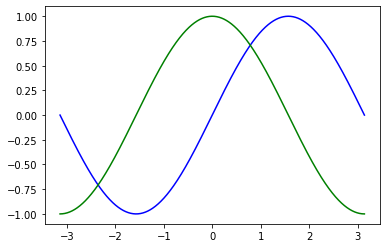

In [123]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(-np.pi,np.pi,1000)
y1 = np.sin(x1)

x2 = np.linspace(-np.pi,np.pi,1000)
y2 = np.cos(x2)

plt.figure()
plt.plot(x1,y1,'b',label='sinx')
plt.plot(x2,y2,'g',label='cosx')
plt.savefig('sin.jpg')
plt.show()

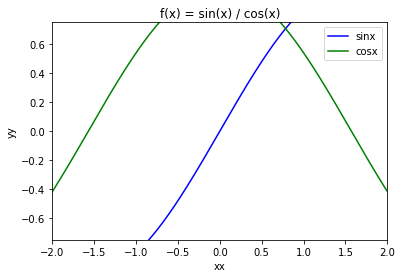

In [124]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(-np.pi,np.pi,1000)
y1 = np.sin(x1)

x2 = np.linspace(-np.pi,np.pi,1000)
y2 = np.cos(x2)

plt.figure()
plt.plot(x1,y1,'b',label='sinx')
plt.plot(x2,y2,'g',label='cosx')
plt.title('f(x) = sin(x) / cos(x)')
plt.legend()
plt.xlabel('xx')
plt.ylabel('yy')
plt.xlim(-2,2)
plt.ylim(-0.75,0.75)
plt.savefig('sin1.jpg')
plt.show()

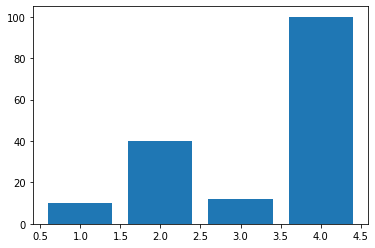

In [126]:
import numpy as np
import matplotlib.pyplot as plt


x = [1,2,3,4]
y = [10,40,12,100]


plt.figure()
plt.bar(x,y)
plt.show()

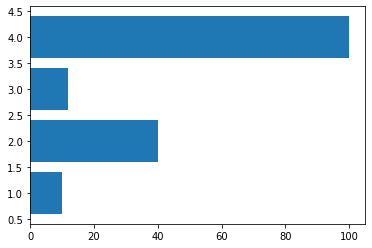

In [127]:
import numpy as np
import matplotlib.pyplot as plt


x = [1,2,3,4]
y = [10,40,12,100]


plt.figure()
plt.barh(x,y)
plt.show()

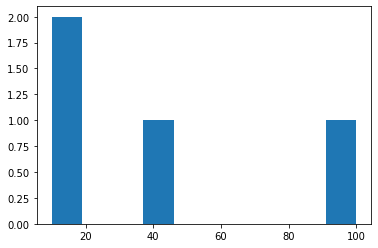

In [128]:
import numpy as np
import matplotlib.pyplot as plt

y = [10,40,12,100]


plt.figure()
plt.hist(y)
plt.show()

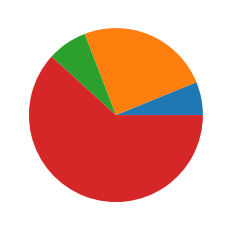

In [129]:
import numpy as np
import matplotlib.pyplot as plt

y = [10,40,12,100]


plt.figure()
plt.pie(y)
plt.show()

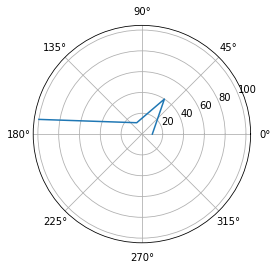

In [130]:
import numpy as np
import matplotlib.pyplot as plt

y = [10,40,12,100]


plt.figure()
plt.polar(y)
plt.show()

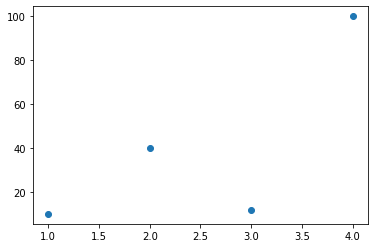

In [131]:
import numpy as np
import matplotlib.pyplot as plt


x = [1,2,3,4]
y = [10,40,12,100]


plt.figure()
plt.scatter(x,y)
plt.show()

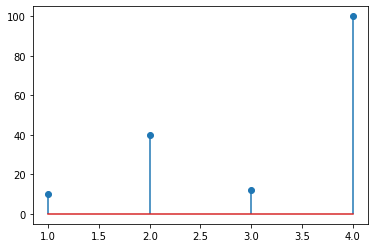

In [132]:
import numpy as np
import matplotlib.pyplot as plt


x = [1,2,3,4]
y = [10,40,12,100]


plt.figure()
plt.stem(x,y)
plt.show()

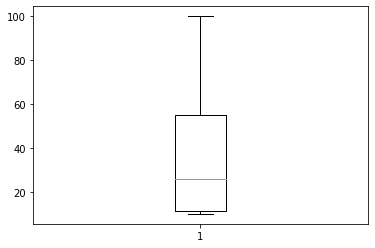

In [133]:
import numpy as np
import matplotlib.pyplot as plt



y = [10,40,12,100]


plt.figure()
plt.boxplot(y)
plt.show()

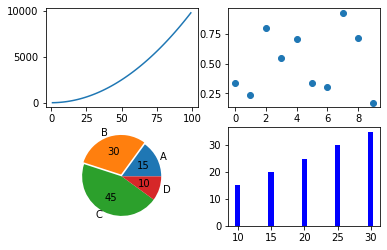

In [134]:
# 画第1个图：折线图
x=np.arange(1,100)
plt.subplot(221)
plt.plot(x,x*x)
 
# 画第2个图：散点图
plt.subplot(222)
plt.scatter(np.arange(0,10), np.random.rand(10))
 
# 画第3个图：饼图
plt.subplot(223)
plt.pie(x=[15,30,45,10],labels=list('ABCD'),autopct='%.0f',explode=[0,0.05,0,0])
 
# 画第4个图：条形图
plt.subplot(224)
plt.bar([20,10,30,25,15],[25,15,35,30,20],color='b')
plt.show()

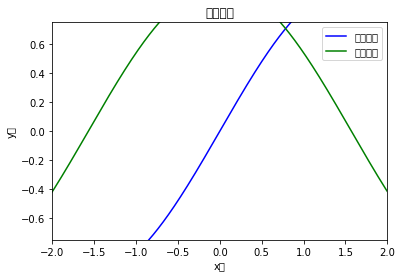

In [136]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(-np.pi,np.pi,1000)
y1 = np.sin(x1)

x2 = np.linspace(-np.pi,np.pi,1000)
y2 = np.cos(x2)

plt.figure()
plt.plot(x1,y1,'b',label='正弦函数')
plt.plot(x2,y2,'g',label='余弦函数')
plt.title('三角函数')
plt.legend()
plt.xlabel('x轴')
plt.ylabel('y轴')
plt.xlim(-2,2)
plt.ylim(-0.75,0.75)
plt.show()

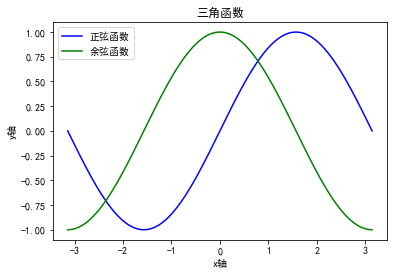

In [138]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
#指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

x1 = np.linspace(-np.pi,np.pi,1000)
y1 = np.sin(x1)

x2 = np.linspace(-np.pi,np.pi,1000)
y2 = np.cos(x2)

plt.figure()
plt.plot(x1,y1,'b',label='正弦函数')
plt.plot(x2,y2,'g',label='余弦函数')
plt.title('三角函数')
plt.legend()
plt.xlabel('x轴')
plt.ylabel('y轴')
plt.show()

# **pandas常用操作**

In [139]:
import pandas as pd

df = pd.DataFrame([['nanjing',1],['beijing',2],['shanghai',3]],columns=['name','value'])
df

,name,value
0,nanjing,1
1,beijing,2
2,shanghai,3


In [141]:
df = pd.read_excel('./examples/example1.xlsx')
df

,name,value
0,nanjing,1
1,beijing,2
2,shanghai,3


In [142]:
df = pd.read_csv('./examples/example2.csv')
df

,name,value
0,nanjing,1
1,beijing,2
2,shanghai,3


In [143]:
df = pd.read_csv('./examples/example3.txt',sep='\t')
df

,name,value
0,nanjing,1
1,beijing,2
2,shanghai,3


In [144]:
df = pd.read_csv('./examples/example3.txt',sep='\t',header=None)
df

,0,1
0,name,value
1,nanjing,1
2,beijing,2
3,shanghai,3


In [147]:
df = pd.read_csv('./examples/example3.txt',sep='\t',header=0)
df

,name,value
0,nanjing,1
1,beijing,2
2,shanghai,3


In [148]:
df = pd.read_csv('./examples/example3.txt',sep='\t',names=['name1','value1'])
df

,name1,value1
0,name,value
1,nanjing,1
2,beijing,2
3,shanghai,3


In [149]:
df = pd.read_csv('./examples/example3.txt',sep='\t',names=['name1','value1'],skiprows=2)
df

,name1,value1
0,beijing,2
1,shanghai,3


In [150]:
df = pd.read_csv('./examples/example3.txt',sep='\t',names=['name1','value1'],nrows=2)
df

,name1,value1
0,name,value
1,nanjing,1


In [162]:
df = pd.read_excel('./examples/example1.xlsx')
df

,name,value
0,nanjing,1
1,beijing,2
2,shanghai,3


In [164]:
df['name']

0     nanjing
1     beijing
2    shanghai
Name: name, dtype: object

In [165]:
df[['value','name']]

,value,name
0,1,nanjing
1,2,beijing
2,3,shanghai


In [166]:
df['value'] + 10

0    11
1    12
2    13
Name: value, dtype: int64

In [167]:
df['name'] + 'hello'

0     nanjinghello
1     beijinghello
2    shanghaihello
Name: name, dtype: object

In [168]:
df['name'] = df['name'] + 'hello'
df

,name,value
0,nanjinghello,1
1,beijinghello,2
2,shanghaihello,3


In [181]:
df['loc'] = ['zh','zh','zh']
df

,name,value,loc
0,nanjinghello,1,zh
1,beijinghello,2,zh
2,shanghaihello,3,zh


In [169]:
df.values

array([['nanjinghello', 1],
       ['beijinghello', 2],
       ['shanghaihello', 3]], dtype=object)

In [170]:
df.values.tolist()

[['nanjinghello', 1], ['beijinghello', 2], ['shanghaihello', 3]]

In [163]:
df.T

,0,1,2
name,nanjing,beijing,shanghai
value,1,2,3


<AxesSubplot:>

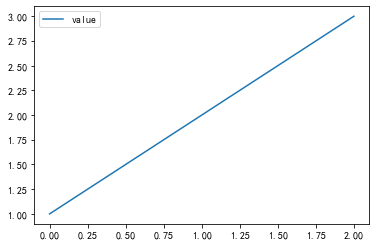

In [153]:
df.plot()

<AxesSubplot:>

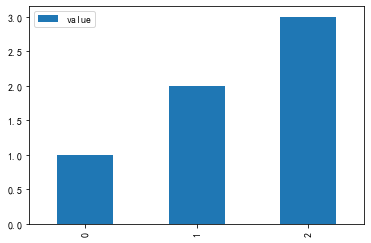

In [154]:
df.plot.bar()

<AxesSubplot:>

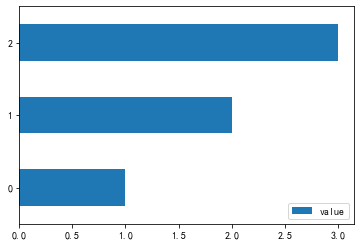

In [155]:
df.plot.barh()

<AxesSubplot:>

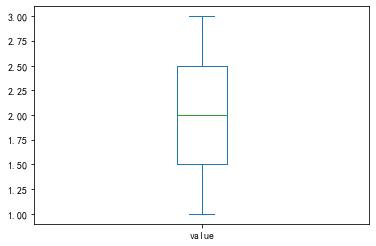

In [156]:
df.plot.box()

<AxesSubplot:ylabel='value'>

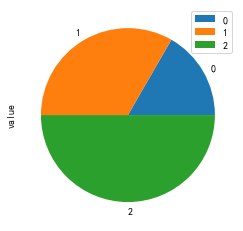

In [161]:
df.plot.pie(y='value')

In [172]:

df = pd.read_excel('./examples/example1.xlsx')

for x in df.values.tolist():
    print(x)

['nanjinghello', 1]
['beijinghello', 2]
['shanghaihello', 3]


In [179]:
for x in df.iterrows():
    print(x[1]['name'],x[1]['value'])

nanjinghello 1
beijinghello 2
shanghaihello 3


In [180]:
for idx,(name,value) in df.iterrows():
    print(idx,name,value)

0 nanjinghello 1
1 beijinghello 2
2 shanghaihello 3


In [182]:
df = pd.read_excel('./examples/example1.xlsx')

df['value'].mean()

2.0

In [183]:
df['value'].std()

1.0

In [194]:
df = pd.read_excel('./examples/example1.xlsx')
df

,name,value
0,nanjing,1
1,beijing,2
2,shanghai,3


In [195]:
def process(x):
    return x * x


df['value'] = df['value'].apply(lambda x: process(x))
df

,name,value
0,nanjing,1
1,beijing,4
2,shanghai,9


In [196]:
def process(x):
    return f"{x['name'] + 'world'} - {x['value'] ** 2}"


df['new'] = df.apply(lambda x: process(x), axis=1)
df

,name,value,new
0,nanjing,1,nanjingworld - 1
1,beijing,4,beijingworld - 16
2,shanghai,9,shanghaiworld - 81


---

# **五、jieba分词**

---

对于中文来说经常需要对一个句子进行词语的切分，而jieba库就是干这个事情

## **安装**

- **`pip install jieba`**

## **分词**

In [41]:
import jieba

text = '我爱北京天安门'

list(jieba.cut(text))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\DELL\AppData\Local\Temp\jieba.cache
Loading model cost 0.645 seconds.
Prefix dict has been built successfully.


['我', '爱', '北京', '天安门']

In [42]:
jieba.lcut(text)

['我', '爱', '北京', '天安门']

In [43]:
# 过滤一定长度

res = jieba.lcut(text)
res = [x for x in res if len(x) >= 2]
res

['北京', '天安门']

## **词性标注**

In [44]:
import jieba.posseg as pseg

text = '我爱北京天安门'

res = pseg.cut(text)

for word,flag in res:
    print(word,flag)

我 r
爱 v
北京 ns
天安门 ns


## **jieba词性表**

In [45]:
# %load ./examples/jieba词性表.txt
1. 名词 (1个一类，7个二类，5个三类)
　　名词分为以下子类：
　　　　n 名词
　　　　nr 人名
　　　　nr1 汉语姓氏
　　　　nr2 汉语名字
　　　　nrj 日语人名
　　　　nrf 音译人名
　　　　ns 地名
　　　　nsf 音译地名
　　　　nt 机构团体名
　　　　nz 其它专名
　　　　nl 名词性惯用语
　　　　ng 名词性语素
2. 时间词(1个一类，1个二类)
　　　　t 时间词
　　　　tg 时间词性语素
3. 处所词(1个一类)
　　　　s 处所词
4. 方位词(1个一类)
　　　　f 方位词
5. 动词(1个一类，9个二类)
　　　　v 动词
　　　　vd 副动词
　　　　vn 名动词
　　　　vshi 动词“是”
　　　　vyou 动词“有”
　　　　vf 趋向动词
　　　　vx 形式动词
　　　　vi 不及物动词（内动词）
　　　　vl 动词性惯用语
　　　　vg 动词性语素
6. 形容词(1个一类，4个二类)
　　　　a 形容词
　　　　ad 副形词
　　　　an 名形词
　　　　ag 形容词性语素
　　　　al 形容词性惯用语
7. 区别词(1个一类，2个二类)
　　　　b 区别词
　　　　bl 区别词性惯用语
8. 状态词(1个一类)
　　　　z 状态词
9. 代词(1个一类，4个二类，6个三类)
　　　　r 代词
　　　　rr 人称代词
　　　　rz 指示代词
　　　　rzt 时间指示代词
　　　　rzs 处所指示代词
　　　　rzv 谓词性指示代词
　　　　ry 疑问代词
　　　　ryt 时间疑问代词
　　　　rys 处所疑问代词
　　　　ryv 谓词性疑问代词
　　　　rg 代词性语素
10. 数词(1个一类，1个二类)
　　　　m 数词
　　　　mq 数量词
11. 量词(1个一类，2个二类)
　　　　q 量词
　　　　qv 动量词
　　　　qt 时量词
12. 副词(1个一类)
　　　　d 副词
13. 介词(1个一类，2个二类)
　　　　p 介词
　　　　pba 介词“把”
　　　　pbei 介词“被”
14. 连词(1个一类，1个二类)
　　　　c 连词
　　　　cc 并列连词
15. 助词(1个一类，15个二类)
　　　　u 助词
　　　　uzhe 着
　　　　ule 了 喽
　　　　uguo 过
　　　　ude1 的 底
　　　　ude2 地
　　　　ude3 得
　　　　usuo 所
　　　　udeng 等 等等 云云
　　　　uyy 一样 一般 似的 般
　　　　udh 的话
　　　　uls 来讲 来说 而言 说来
　　　　uzhi 之
　　　　ulian 连 （“连小学生都会”）
16. 叹词(1个一类)
　　　　e 叹词
17. 语气词(1个一类)
　　　　y 语气词(delete yg)
18. 拟声词(1个一类)
　　　　o 拟声词
19. 前缀(1个一类)
　　　　h 前缀
20. 后缀(1个一类)
　　　　k 后缀
21. 字符串(1个一类，2个二类)
　　　　x 字符串
　　　　xx 非语素字
　　　　xu 网址URL
22. 标点符号(1个一类，16个二类)
　　　　w 标点符号
　　　　wkz 左括号，全角：（ 〔 ［ ｛ 《 【 〖 〈 半角：( [ { <
　　　　wky 右括号，全角：） 〕 ］ ｝ 》 】 〗 〉 半角： ) ] { >
　　　　wyz 左引号，全角：“ ‘ 『
　　　　wyy 右引号，全角：” ’ 』
　　　　wj 句号，全角：。
　　　　ww 问号，全角：？ 半角：?
　　　　wt 叹号，全角：！ 半角：!
　　　　wd 逗号，全角：， 半角：,
　　　　wf 分号，全角：； 半角： ;
　　　　wn 顿号，全角：、
　　　　wm 冒号，全角：： 半角： :
　　　　ws 省略号，全角：…… …
　　　　wp 破折号，全角：—— －－ ——－ 半角：--- ----
　　　　wb 百分号千分号，全角：％ ‰ 半角：%
　　　　wh 单位符号，全角：￥ ＄ ￡ ° ℃ 半角：$

## **加载用户词典和停用词**

- **停用词：过滤掉一些分词的结果**
- **用户词典：通过自己的意愿分词**

In [46]:
# 停用词

import jieba

stopwords = ['我']

text = '我爱北京天安门'

res = [x for x in jieba.cut(text) if x not in stopwords]
res

['爱', '北京', '天安门']

In [47]:
# 用户词典

import jieba

text = '我爱北京天安门'

res = [x for x in jieba.cut(text)]
res

['我', '爱', '北京', '天安门']

In [48]:
import jieba
jieba.add_word('北京天安门')

text = '我爱北京天安门'

res = [x for x in jieba.cut(text)]
res

['我', '爱', '北京天安门']

In [50]:
# 删除词典

import jieba
jieba.del_word('北京天安门')

text = '我爱北京天安门'

res = [x for x in jieba.cut(text)]
res

['我', '爱', '北京', '天安门']

In [52]:
# 用户词很多，可以存到一个文件加载

import jieba

jieba.load_userdict("./examples/userdict.txt")

text = '我爱北京天安门'

res = [x for x in jieba.cut(text)]
res

['我', '爱', '北京天安门']

---

# **六、pillow**

---

是一个非常好用的图像处理库

## **安装**

- **`pip install pillow`**

## **读取和创建图像**

In [53]:
import PIL
from PIL import Image

In [58]:
# 打开图片

image = Image.open("./images/requests1.png")
# image.show()

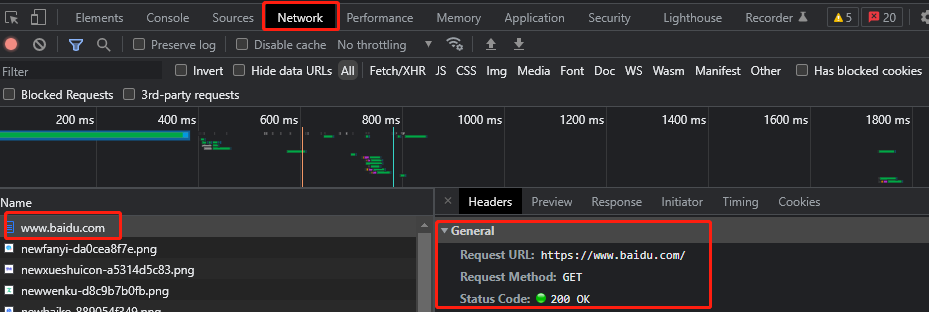

In [59]:
image

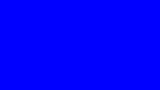

In [60]:
# 创建一个新的图片

from PIL import Image
 
image = Image.new('RGB', (160, 90), (0, 0, 255))
image

In [61]:
# 常用属性

from PIL import Image
 
image = Image.open("./images/requests1.png")
print('width: ', image.width)
print('height: ', image.height)
print('size: ', image.size)
print('mode: ', image.mode)
print('format: ', image.format)
print('category: ', image.category)
print('readonly: ', image.readonly)
print('info: ', image.info)

width:  929
height:  312
size:  (929, 312)
mode:  RGBA
format:  PNG
category:  0
readonly:  1
info:  {'srgb': 0, 'gamma': 0.45455, 'dpi': (96, 96)}


C:\Users\DELL\AppData\Local\Temp/ipykernel_8784/4122890473.py:11: DeprecationWarning: Image categories are deprecated and will be removed in Pillow 10 (2023-01-02). Use is_animated instead.
  print('category: ', image.category)


## **图片的模式和模式转换**



|**mode**|**描述**|
|---|---|
|**1**|**1位像素，黑白，每字节存储一个像素**|
|**L**|**8位像素，黑白**|
|**P**|**8位像素，使用调色板映射到任何其他模式**|
|**RGB**|**3x8位像素，真彩**|
|**RGBA**|**4x8位像素，带透明蒙版的真彩**|
|**CMYK**|**4x8位像素，分色**|
|**YCbCr**|**3x8位像素，彩色视频格式**|
|**LAB**|**3x8位像素，L * a * b颜色空间**|
|**HSV**|**3x8位像素，色相，饱和度，值颜色空间**|
|**I**|**32位有符号整数像素**|
|**F**|**2位浮点像素**|

RGBA


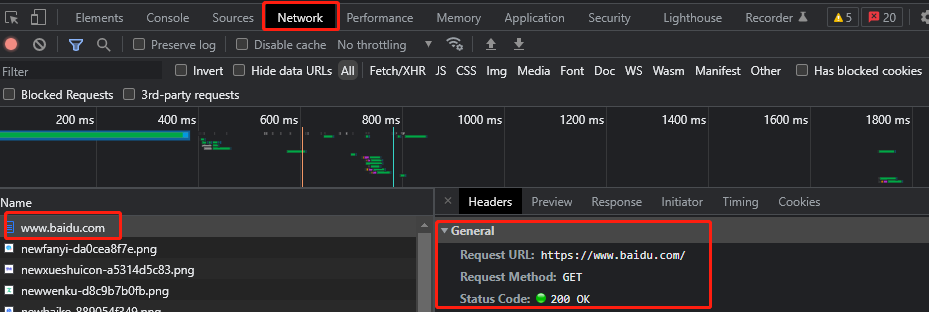

In [64]:
from PIL import Image
 
image = Image.open("./images/requests1.png")

print(image.mode)

image

1


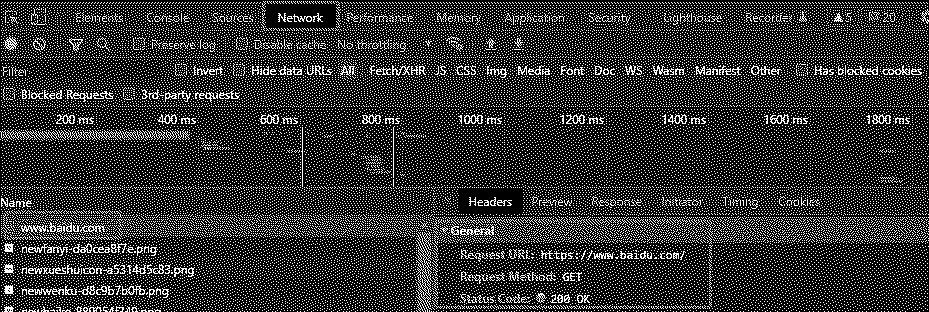

In [63]:
image1 = image.convert('1')

print(image1.mode)

image1

L


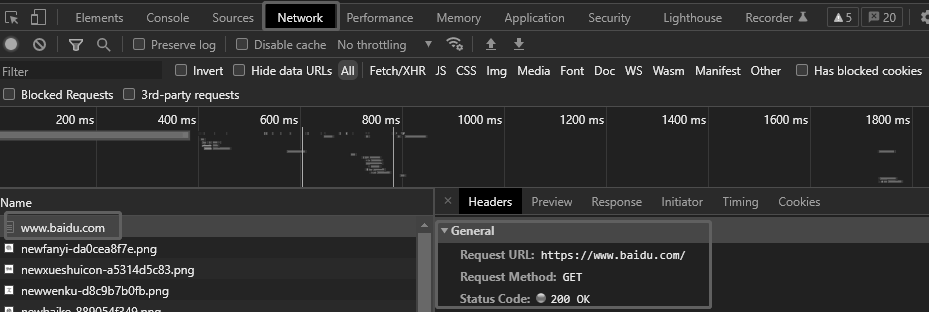

In [65]:
image2 = image.convert('L')
print(image2.mode)
image2

P


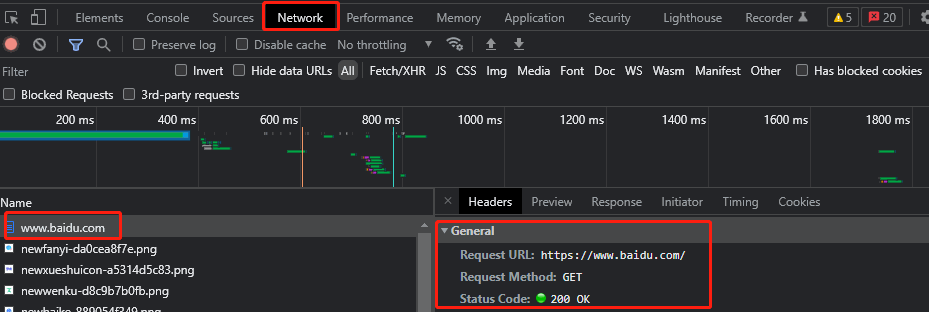

In [66]:
image3 = image.convert('P')
print(image3.mode)
image3

## **图片拷贝粘贴和保存**

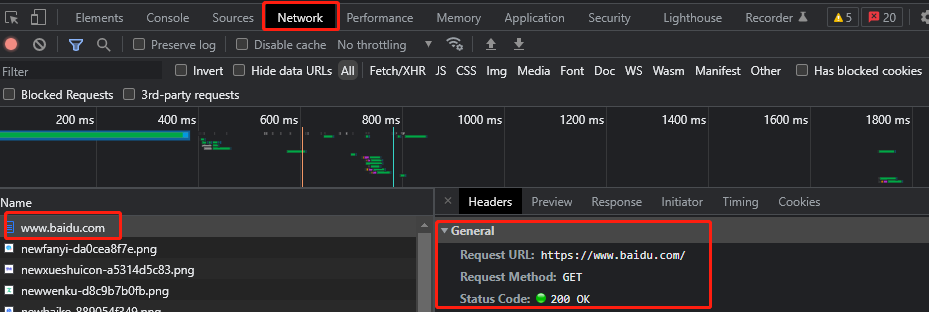

In [67]:
## 拷贝

from PIL import Image
 
image = Image.open("./images/requests1.png")


image_copy = image.copy()
image_copy

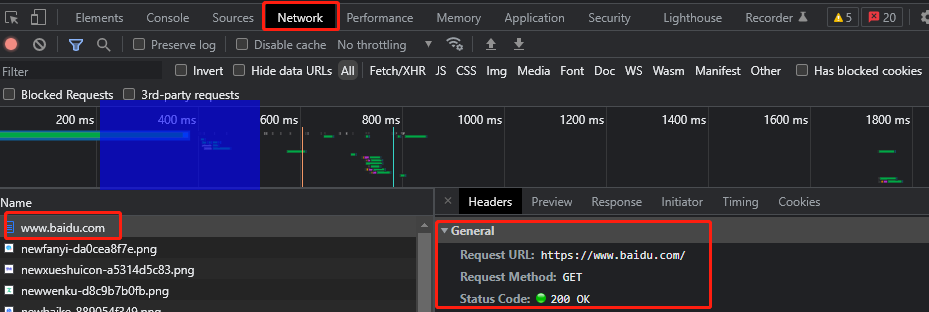

In [69]:
## 粘贴

image_new = Image.new('RGB', (160, 90), (0, 0, 255))
image_new2 = Image.new('L', (160, 90), '#646464')
image_copy.paste(image_new, (100, 100, 260, 190), mask=image_new2)
image_copy

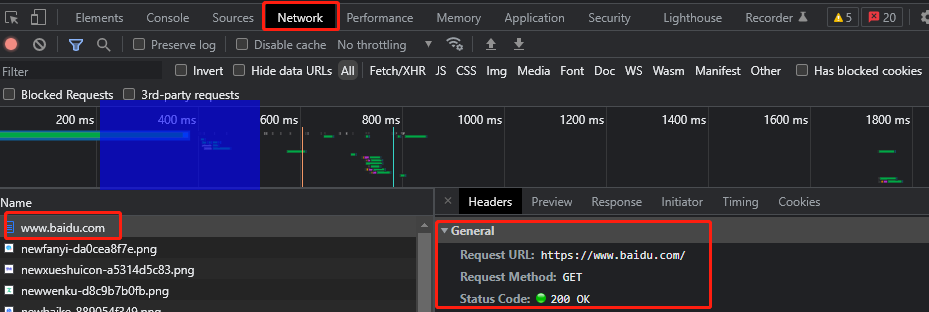

In [72]:
## 保存

image_copy.save('./images/new.png')

image = Image.open("./images/new.png")
image

## **图片的裁剪、缩放、旋转**

In [98]:
from PIL import Image
 
image = Image.open("./images/new.png")
image.size

(929, 312)

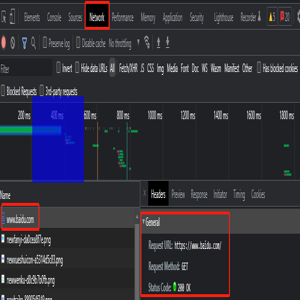

In [99]:
## 缩放

image1 = image.resize((300,300))
image1

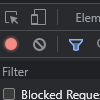

In [100]:
## 裁剪：box表示裁剪的区域，传入长度为4的元组(x0, y0, x1, y1)，不传默认为拷贝原图

image.crop(box=(0, 0, 100, 100))

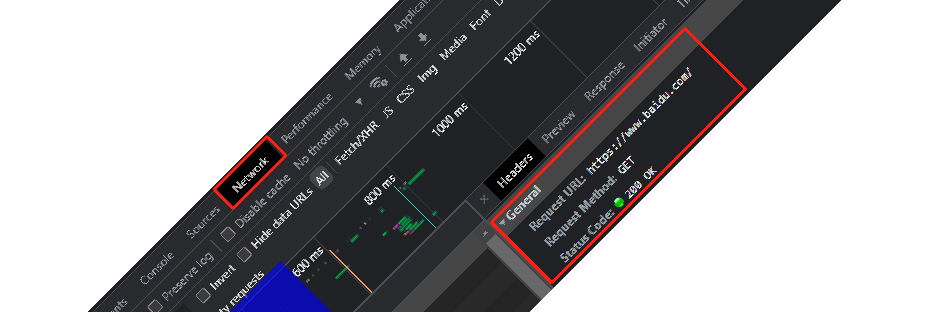

In [101]:
## 旋转45度

image.rotate(45)

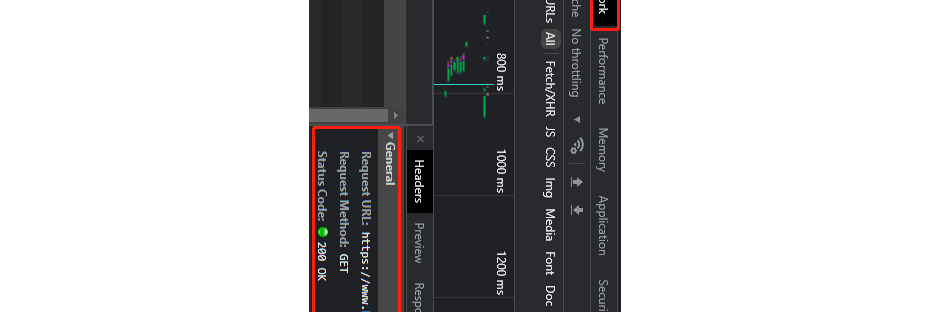

In [102]:
image.rotate(270)

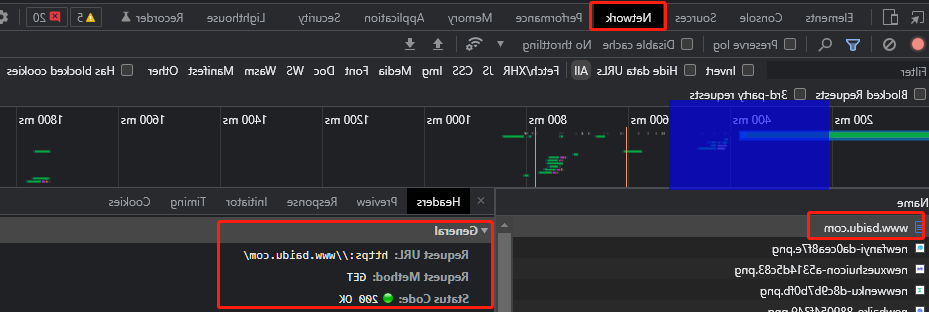

In [103]:
image.transpose(Image.FLIP_LEFT_RIGHT)       #左右对换。

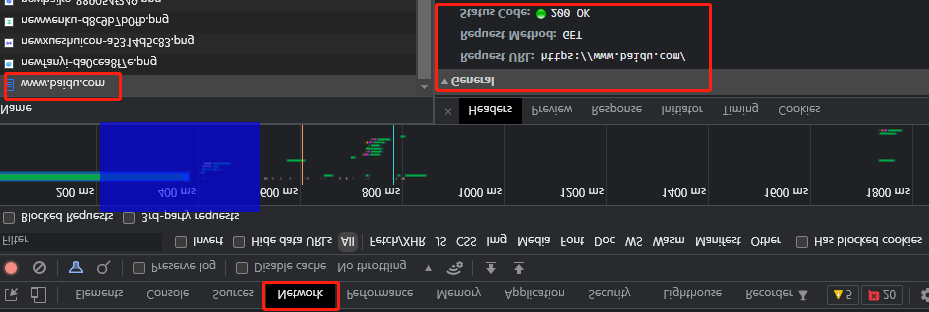

In [104]:
image.transpose(Image.FLIP_TOP_BOTTOM)       #上下对换。

## **Filter**

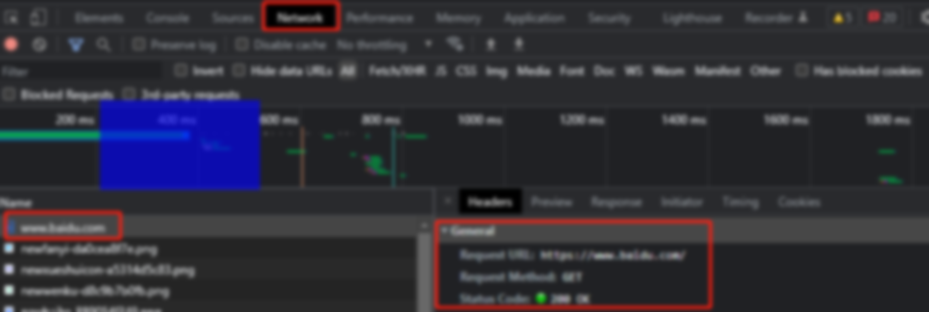

In [83]:
from PIL import Image, ImageFilter 
im = Image.open('./images/new.png') 
# 高斯模糊 
im.filter(ImageFilter.GaussianBlur) 

---

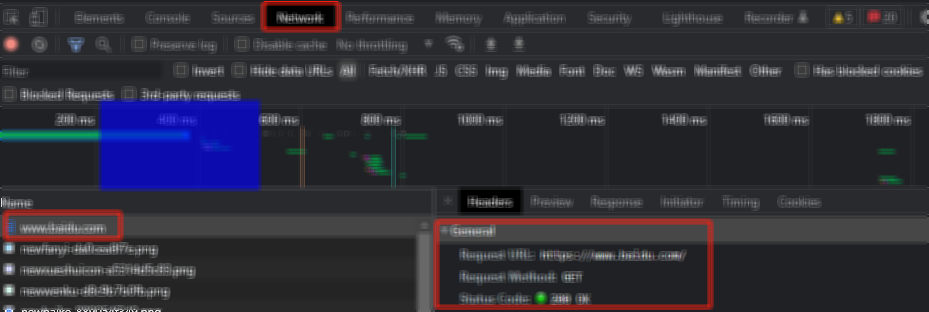

In [84]:
# 普通模糊 
im.filter(ImageFilter.BLUR) 

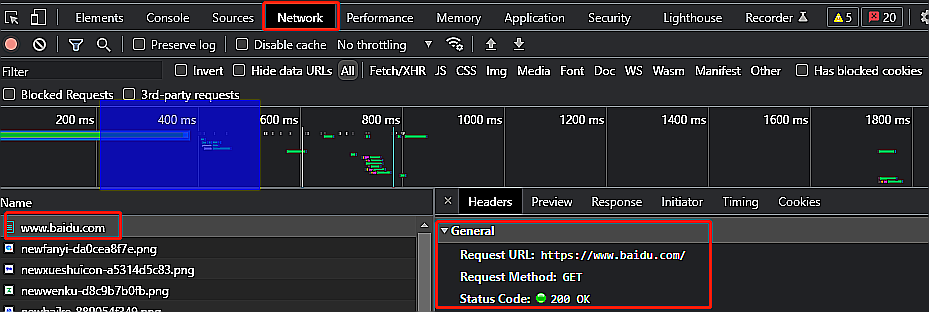

In [85]:
# 边缘增强 
im.filter(ImageFilter.EDGE_ENHANCE) 

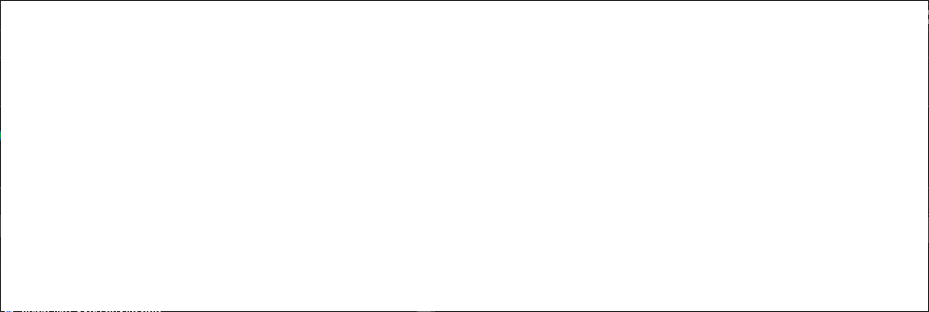

In [86]:
# 找到边缘 
im.filter(ImageFilter.FIND_EDGES) 

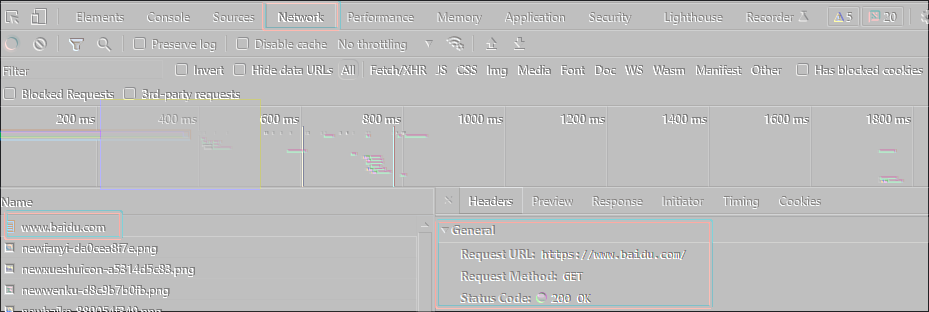

In [87]:
# 浮雕 
im.filter(ImageFilter.EMBOSS) 

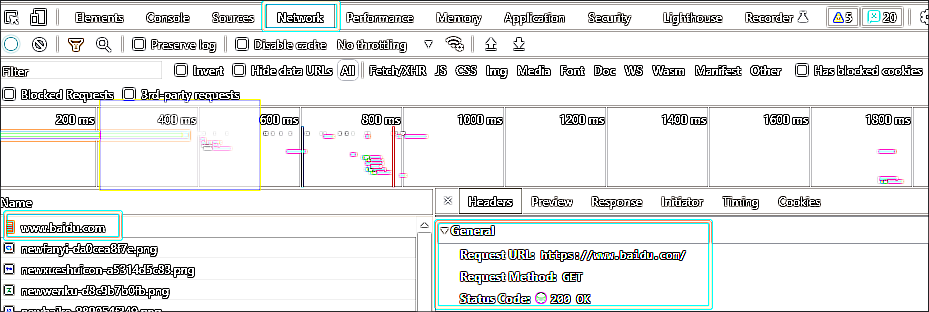

In [88]:
# 轮廓 
im.filter(ImageFilter.CONTOUR) 

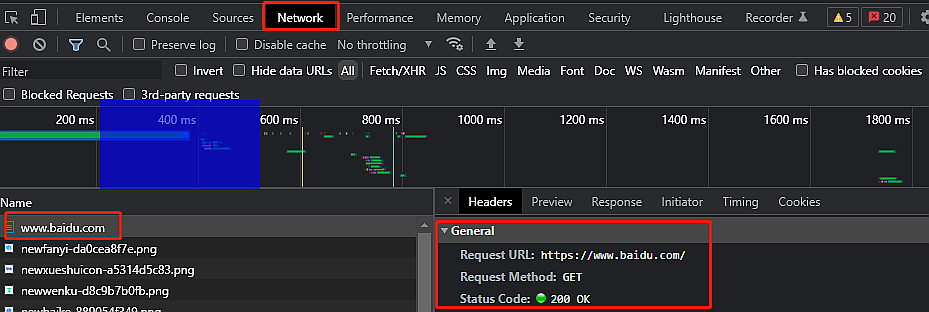

In [89]:
# 锐化 
im.filter(ImageFilter.SHARPEN) 

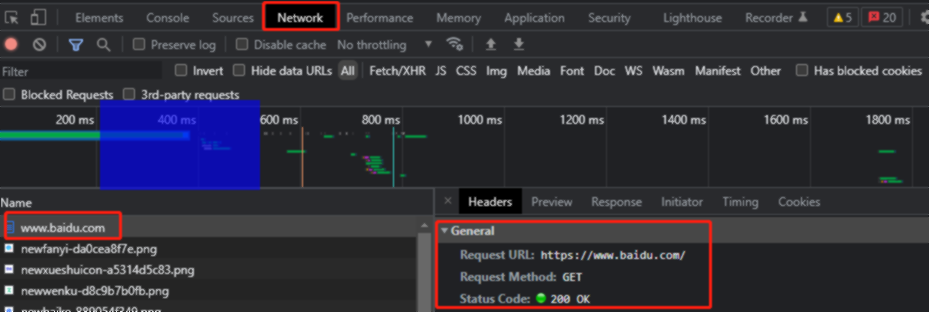

In [90]:
# 平滑 
im.filter(ImageFilter.SMOOTH) 

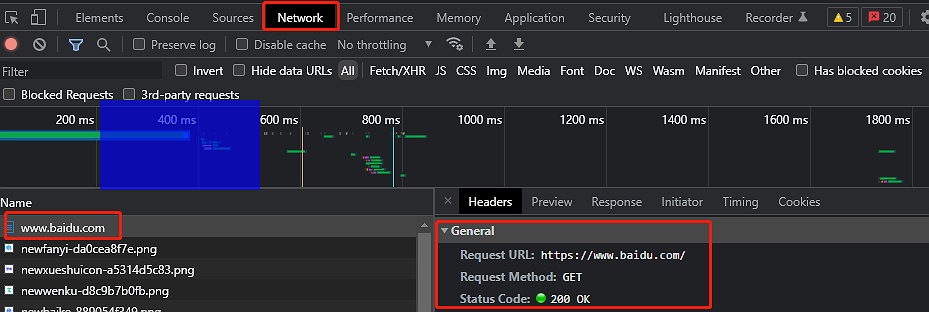

In [91]:
# 细节 
im.filter(ImageFilter.DETAIL)

## **对比度**

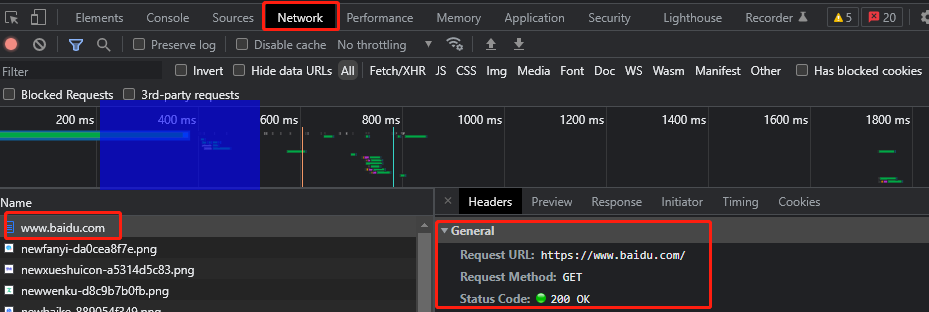

In [93]:
from PIL import Image  
from PIL import ImageEnhance 

image = Image.open('./images/new.png') 
image

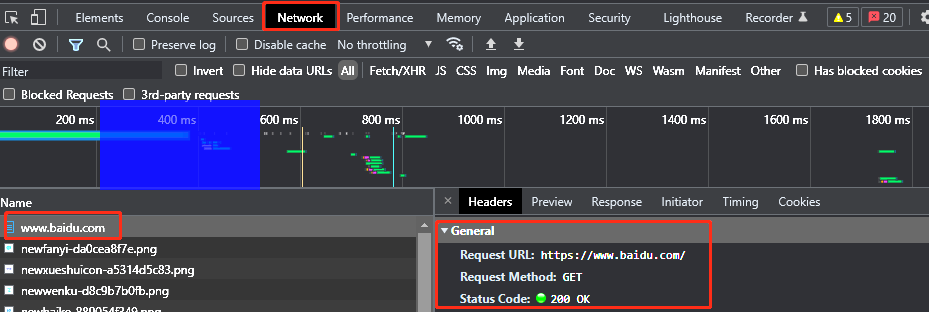

In [94]:
#亮度增强  
enh_bri = ImageEnhance.Brightness(image)  
brightness = 1.5  
image_brightened = enh_bri.enhance(brightness) 
image_brightened 

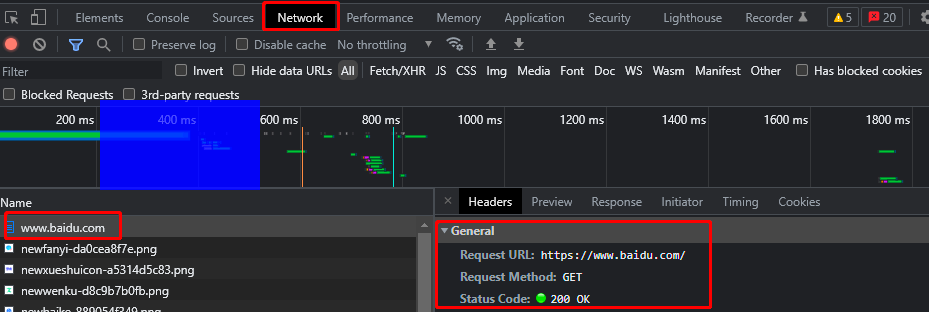

In [95]:
#色度增强  
enh_col = ImageEnhance.Color(image)  
color = 1.5  
image_colored = enh_col.enhance(color) 
image_colored

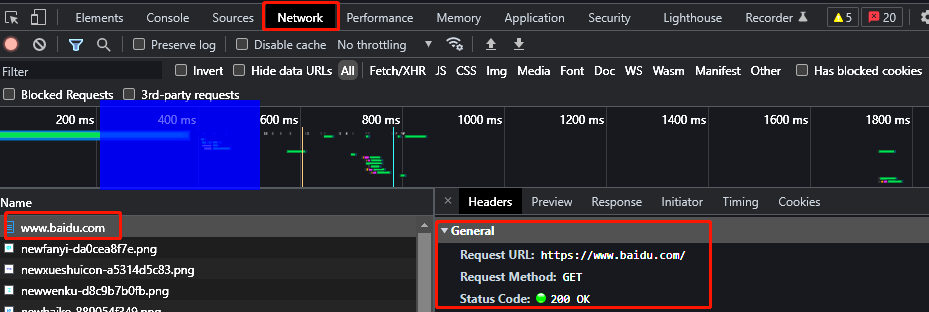

In [96]:
#对比度增强  
enh_con = ImageEnhance.Contrast(image)  
contrast = 1.5  
image_contrasted = enh_con.enhance(contrast) 
image_contrasted

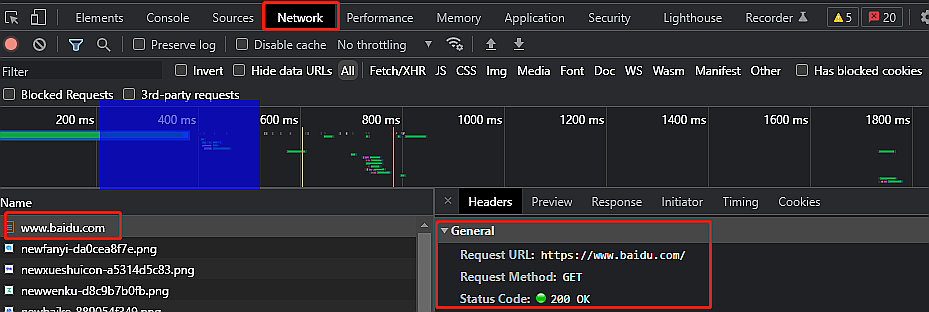

In [97]:
#锐度增强  
enh_sha = ImageEnhance.Sharpness(image)  
sharpness = 3.0  
image_sharped = enh_sha.enhance(sharpness) 
image_sharped

# **七、opencv**

---

opencv是一个计算机视觉处理库，里面除了包含图片处理之外还有很多视觉算法，非常强大

## **安装**

- **`pip install opencv-python`**
- **`pip install opencv-contrib-python`**

## **导入**

- **`import cv2`**


## **图像读取和显示**

In [2]:
import cv2

image = cv2.imread('./images/new.png')
image

array([[[36, 33, 32],
        [36, 33, 32],
        [36, 33, 32],
        ...,
        [36, 33, 32],
        [36, 33, 32],
        [36, 33, 32]],

       [[36, 33, 32],
        [36, 33, 32],
        [36, 33, 32],
        ...,
        [36, 33, 32],
        [36, 33, 32],
        [36, 33, 32]],

       [[36, 33, 32],
        [36, 33, 32],
        [36, 33, 32],
        ...,
        [36, 33, 32],
        [36, 33, 32],
        [36, 33, 32]],

       ...,

       [[41, 41, 41],
        [41, 41, 41],
        [41, 41, 41],
        ...,
        [36, 33, 32],
        [36, 33, 32],
        [36, 33, 32]],

       [[41, 41, 41],
        [41, 41, 41],
        [41, 41, 41],
        ...,
        [36, 33, 32],
        [36, 33, 32],
        [36, 33, 32]],

       [[41, 41, 41],
        [41, 41, 41],
        [41, 41, 41],
        ...,
        [36, 33, 32],
        [36, 33, 32],
        [36, 33, 32]]], dtype=uint8)

In [106]:
cv2.imshow('image',image)

In [13]:
image.shape

(312, 929, 3)

## **保存图像**

In [3]:
cv2.imwrite('./images/new1.png',image)

True

## **绘制几何图像**

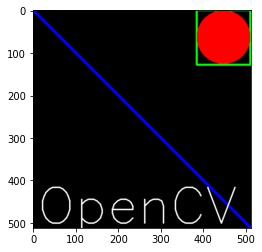

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1 创建一个空白的图像
img = np.zeros((512,512,3), np.uint8)

# 2 绘制图形
cv2.line(img,(0,0),(511,511),(255,0,0),5)
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv2.circle(img,(447,63), 63, (0,0,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

# 3 图像展示
plt.imshow(img[:,:,::-1])
plt.show()

## **色彩空间的改变**

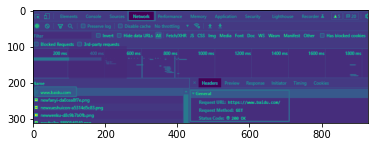

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./images/new.png')
image1 = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.imshow(image1)
plt.show()

## **人脸识别**

In [24]:
import cv2
import numpy as np

# 加载OpenCV人脸检测分类器Haar
face_cascade = cv2.CascadeClassifier("D:/anaconda/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")

# # 准备好识别方法LBPH方法
# recognizer = cv2.face.LBPHFaceRecognizer_create()


img = cv2.imread('./images/face.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# 检测人脸，将每一帧摄像头记录的数据带入OpenCv中，让Classifier判断人脸
# 其中gray为要检测的灰度图像，1.3为每次图像尺寸减小的比例，5为minNeighbors
faces = face_cascade.detectMultiScale(gray,1.3,6)

# 框选人脸，for循环保证一个能检测的实时动态视频流
for idx,(x, y, w, h) in enumerate(faces):
    # xy为左上角的坐标,w为宽，h为高，用rectangle为人脸标记画框
    cv2.rectangle(img, (x, y), (x + w, y + w), (255, 0, 0))
    # 保存图像，把灰度图片看成二维数组来检测人脸区域，这里是保存在data缓冲文件夹内
    cv2.imwrite(f"./images/{idx}.jpg", gray[y:y + h, x:x + w])


## **打开视频和调用摄像头**

In [28]:
# %load readvideo.py
import cv2 as cv

if __name__ == '__main__':
    video = cv.VideoCapture()
    video.open('./examples/1.mp4')
    #判断是否成功创建视频流
    while video.isOpened():
        ret,frame = video.read()
        print(ret)
        if ret is True:
            cv.imshow('video: ./examples/1.mp4',frame)
            #设置播放速速
            cv.waitKey(int(1000 / video.get(cv.CAP_PROP_FPS)))
            #按下q键退出
            if cv.waitKey(1) & 0xFF == ord('q'):
                break
                    #输出相关参数信息
    print('视频中的图像宽度{}'.format(video.get(cv.CAP_PROP_FRAME_WIDTH))) 
    print('视频中的图像高度{}'.format(video.get(cv.CAP_PROP_FRAME_HEIGHT))) 
    print('视频帧率{}'.format(video.get(cv.CAP_PROP_FPS))) 
    print('视频帧数{}'.format(video.get(cv.CAP_PROP_FRAME_COUNT))) 
    #释放资源并关闭窗口
    video.release()
    cv.destroyAllWindows()

In [29]:
%%cmd
python readvideo.py

Process is interrupted.
